In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

### Data Preparation

In [3]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # expands the series dimensions
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [5]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [6]:
window_size = 30

# Defines train set
train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

### Model Architecture

In [7]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          128       
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dense (Dense)                (None, None, 1)           33        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0         
Total params: 16,801
Trainable params: 16,801
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)


model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [10]:
history = model.fit(train_set, epochs=500)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 0s 40ms/step - loss: 33.6304 - mae: 34.1275
Epoch 2/500
8/8 [==============================] - 0s 31ms/step - loss: 19.6771 - mae: 20.1725
Epoch 3/500
8/8 [==============================] - 0s 29ms/step - loss: 14.2779 - mae: 14.7707
Epoch 4/500
8/8 [==============================] - 0s 28ms/step - loss: 10.4851 - mae: 10.9740
Epoch 5/

8/8 [==============================] - 0s 32ms/step - loss: 4.6077 - mae: 5.0838
Epoch 79/500
8/8 [==============================] - 0s 30ms/step - loss: 4.5748 - mae: 5.0506
Epoch 80/500
8/8 [==============================] - 0s 38ms/step - loss: 4.5594 - mae: 5.0348
Epoch 81/500
8/8 [==============================] - 0s 31ms/step - loss: 4.6519 - mae: 5.1285
Epoch 82/500
8/8 [==============================] - 0s 33ms/step - loss: 4.6715 - mae: 5.1486
Epoch 83/500
8/8 [==============================] - 0s 29ms/step - loss: 4.7810 - mae: 5.2582
Epoch 84/500
8/8 [==============================] - 0s 30ms/step - loss: 4.6678 - mae: 5.1447
Epoch 85/500
8/8 [==============================] - 0s 31ms/step - loss: 4.5931 - mae: 5.0684
Epoch 86/500
8/8 [==============================] - 0s 30ms/step - loss: 4.5653 - mae: 5.0408
Epoch 87/500
8/8 [==============================] - 0s 30ms/step - loss: 4.5542 - mae: 5.0300
Epoch 88/500
8/8 [==============================] - 0s 35ms/step - loss: 

8/8 [==============================] - 0s 30ms/step - loss: 4.3478 - mae: 4.8234
Epoch 165/500
8/8 [==============================] - 0s 30ms/step - loss: 4.3355 - mae: 4.8109
Epoch 166/500
8/8 [==============================] - 0s 30ms/step - loss: 4.3242 - mae: 4.7997
Epoch 167/500
8/8 [==============================] - 0s 29ms/step - loss: 4.3186 - mae: 4.7941
Epoch 168/500
8/8 [==============================] - 0s 30ms/step - loss: 4.3444 - mae: 4.8199
Epoch 169/500
8/8 [==============================] - 0s 29ms/step - loss: 4.3131 - mae: 4.7888
Epoch 170/500
8/8 [==============================] - 0s 29ms/step - loss: 4.3058 - mae: 4.7816
Epoch 171/500
8/8 [==============================] - 0s 29ms/step - loss: 4.3112 - mae: 4.7861
Epoch 172/500
8/8 [==============================] - 0s 30ms/step - loss: 4.2976 - mae: 4.7725
Epoch 173/500
8/8 [==============================] - 0s 27ms/step - loss: 4.3043 - mae: 4.7794
Epoch 174/500
8/8 [==============================] - 0s 28ms/ste

8/8 [==============================] - 0s 30ms/step - loss: 4.2500 - mae: 4.7247
Epoch 251/500
8/8 [==============================] - 0s 30ms/step - loss: 4.2115 - mae: 4.6861
Epoch 252/500
8/8 [==============================] - 0s 29ms/step - loss: 4.1948 - mae: 4.6699
Epoch 253/500
8/8 [==============================] - 0s 30ms/step - loss: 4.2013 - mae: 4.6761
Epoch 254/500
8/8 [==============================] - 0s 30ms/step - loss: 4.1955 - mae: 4.6703
Epoch 255/500
8/8 [==============================] - 0s 29ms/step - loss: 4.1935 - mae: 4.6683
Epoch 256/500
8/8 [==============================] - 0s 29ms/step - loss: 4.2161 - mae: 4.6919
Epoch 257/500
8/8 [==============================] - 0s 30ms/step - loss: 4.2195 - mae: 4.6940
Epoch 258/500
8/8 [==============================] - 0s 30ms/step - loss: 4.2486 - mae: 4.7244
Epoch 259/500
8/8 [==============================] - 0s 28ms/step - loss: 4.2494 - mae: 4.7248
Epoch 260/500
8/8 [==============================] - 0s 29ms/ste

8/8 [==============================] - 0s 37ms/step - loss: 4.1463 - mae: 4.6217
Epoch 337/500
8/8 [==============================] - 0s 47ms/step - loss: 4.1490 - mae: 4.6238
Epoch 338/500
8/8 [==============================] - 0s 40ms/step - loss: 4.1348 - mae: 4.6093
Epoch 339/500
8/8 [==============================] - 0s 44ms/step - loss: 4.1178 - mae: 4.5922
Epoch 340/500
8/8 [==============================] - 0s 42ms/step - loss: 4.1358 - mae: 4.6107
Epoch 341/500
8/8 [==============================] - 0s 42ms/step - loss: 4.1481 - mae: 4.6233
Epoch 342/500
8/8 [==============================] - 0s 61ms/step - loss: 4.1475 - mae: 4.6228
Epoch 343/500
8/8 [==============================] - 0s 44ms/step - loss: 4.1227 - mae: 4.5972
Epoch 344/500
8/8 [==============================] - 0s 45ms/step - loss: 4.1269 - mae: 4.6019
Epoch 345/500
8/8 [==============================] - 0s 43ms/step - loss: 4.1297 - mae: 4.6053
Epoch 346/500
8/8 [==============================] - 0s 46ms/ste

8/8 [==============================] - 0s 36ms/step - loss: 4.0801 - mae: 4.5551
Epoch 423/500
8/8 [==============================] - 0s 27ms/step - loss: 4.0840 - mae: 4.5598
Epoch 424/500
8/8 [==============================] - 0s 38ms/step - loss: 4.0825 - mae: 4.5574
Epoch 425/500
8/8 [==============================] - 0s 31ms/step - loss: 4.1119 - mae: 4.5868
Epoch 426/500
8/8 [==============================] - 0s 34ms/step - loss: 4.1004 - mae: 4.5756
Epoch 427/500
8/8 [==============================] - 0s 32ms/step - loss: 4.0852 - mae: 4.5601
Epoch 428/500
8/8 [==============================] - 0s 32ms/step - loss: 4.0883 - mae: 4.5637
Epoch 429/500
8/8 [==============================] - 0s 31ms/step - loss: 4.0865 - mae: 4.5616
Epoch 430/500
8/8 [==============================] - 0s 31ms/step - loss: 4.0792 - mae: 4.5545
Epoch 431/500
8/8 [==============================] - 0s 29ms/step - loss: 4.0825 - mae: 4.5580
Epoch 432/500
8/8 [==============================] - 0s 43ms/ste

### Model Evaluation

In [11]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 

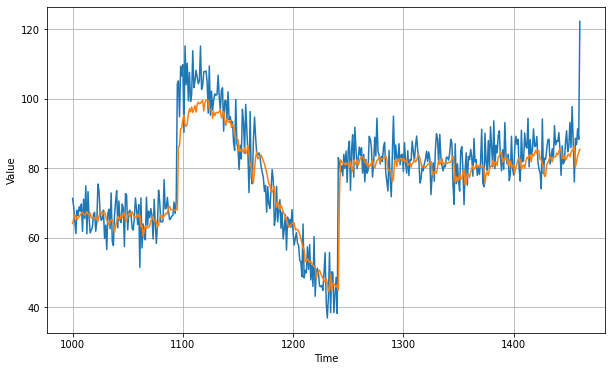

In [12]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [13]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

5.090779

In [14]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

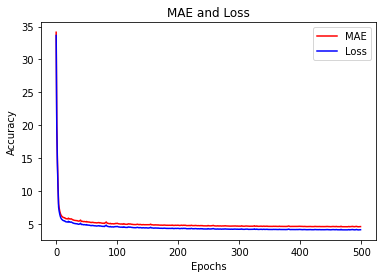

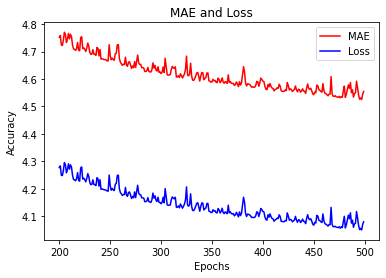

<Figure size 432x288 with 0 Axes>

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()